# 2. Quantitative exploratory data analysis

Dalam bab ini, Anda akan menghitung statistik ringkasan yang berguna, yang berfungsi untuk menggambarkan secara ringkas fitur-fitur penting dari dataset dengan beberapa angka.

## Preparing Data and Library

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [12]:
# Load data
iris = pd.read_csv('datasets/iris.csv')

# Create data array
setosa_petal_length = np.array(iris['petal length (cm)'].loc[iris['species'] == 'setosa'])
versicolor_petal_length = np.array(iris['petal length (cm)'].loc[iris['species'] == 'versicolor'])
virginica_petal_length = np.array(iris['petal length (cm)'].loc[iris['species'] == 'virginica'])
versicolor_petal_width = np.array(iris['petal width (cm)'].loc[iris['species'] == 'versicolor'])

## Introduction to summary statistics: The sample mean and median

### Means and medians

Yang mana dari pernyataan berikut ini yang benar tentang `mean` (rata-rata) dan `median`?

**Benar**

* Outlier dapat secara signifikan mempengaruhi nilai mean, tetapi tidak median.

**Salah**

* Outlier dapat secara signifikan mempengaruhi nilai mean dan median.
* Mean dan median secara umum keduanya kuat untuk outlier tunggal.
* Mean dan median sama jika ada jumlah poin data ganjil.

### Computing means

Nilai rata-rata dari semua pengukuran memberikan indikasi besarnya tipikal suatu pengukuran. Itu dihitung menggunakan `np.mean()`.

In [3]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Percentiles, outliers, and box plots

### Computing percentiles

Dalam latihan ini, Anda akan menghitung persentil dari panjang kelopak *Iris versicolor*.

In [4]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

Untuk melihat bagaimana persentil berhubungan dengan ECDF, Anda akan memplot persentil dari panjang kelopak *Iris versicolor* yang Anda hitung dalam latihan terakhir pada plot ECDF yang Anda hasilkan di bab 1. Variabel persentil dari latihan sebelumnya tersedia di ruang kerja sebagai `ptiles_vers` dan `percentiles`.

Perhatikan bahwa untuk memastikan sumbu Y plot ECDF tetap antara 0 dan 1, Anda harus mengubah skala array `percentiles` yang sesuai - dalam hal ini, membaginya dengan 100.

In [5]:
# Computing the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

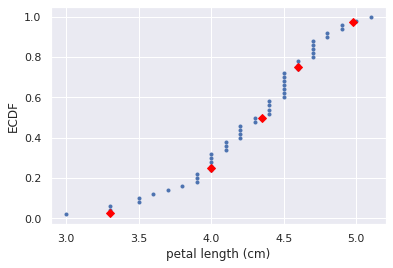

In [6]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plot

Membuat box plot untuk panjang kelopak tidak diperlukan, karena dataset iris tidak terlalu besar dan bee swarm plot bekerja dengan baik. Namun, tidak ada salahnya untuk berlatih. Buat box plot dengan panjang kelopak bunga iris.

Untuk referensi Anda, kode yang digunakan untuk menghasilkan box plot:

<pre>
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
</pre>

Di Shell IPython, Anda dapat menggunakan `sns.boxplot?` atau `help(sns.boxplot)` untuk detail lebih lanjut tentang cara membuat box plot menggunakan seaborn.

In [7]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


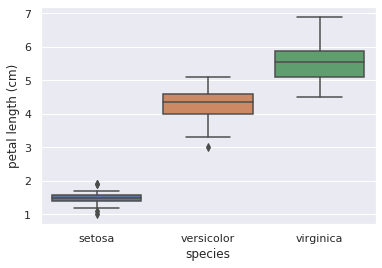

In [8]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## Variance and standard deviation

### Computing the variance

Penting untuk memiliki pemahaman tentang apa fungsi yang umum digunakan. Meskipun Anda mungkin sudah tahu cara menghitung varian, ini adalah kursus pemula yang tidak berasumsi demikian. Dalam latihan ini, kami akan secara eksplisit menghitung varians dari panjang kelopak *Iris veriscolor* menggunakan persamaan yang dibahas dalam video. Kami kemudian akan menggunakan *np.var()* untuk menghitungnya.

In [9]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

Seperti yang disebutkan dalam video, standar deviasi adalah akar kuadrat dari varians. Anda akan melihat ini sendiri dengan menghitung standar deviasi menggunakan `np.std()` dan membandingkannya dengan apa yang Anda dapatkan dengan menghitung varians dengan `np.var()` dan kemudian menghitung akar kuadrat.

In [10]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Covariance and the Pearson correlation coefficient

### Scatter plots

Ketika Anda membuat bee swarm plots, box plot, dan plot ECDF pada latihan sebelumnya, Anda membandingkan panjang kelopak spesies iris yang berbeda. Tetapi bagaimana jika Anda ingin membandingkan dua sifat dari satu spesies? Inilah yang akan kita lakukan dalam latihan ini. Kami akan membuat **scatter** plot ukuran panjang dan lebar kelopak bunga Iris's Anderson. Jika bunga bersisik (yaitu, ia mempertahankan proporsinya saat tumbuh), kami berharap panjang dan lebar akan dikorelasikan.

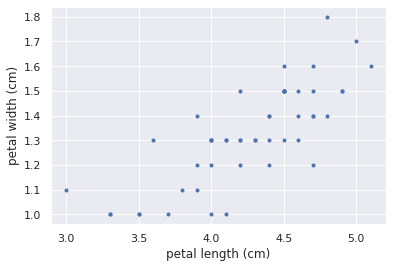

In [13]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

**Note** : Memang, kami melihat beberapa korelasi. Kelopak yang lebih panjang juga cenderung lebih lebar.

### Variance and covariance by looking

Pertimbangkan empat scatter plot data x-y dibawah ini. Yang masing-masing memiliki:

* varian tertinggi dalam variabel x,
* kovarians tertinggi,
* kovarians negatif?

![text](images/scatter-plot-iris.svg)

**Answer** : d, c, b

### Computing the covariance

Kovarians dapat dihitung menggunakan fungsi Numpy `np.cov()`. Sebagai contoh, kami memiliki dua dataset `x` dan `y`, `np.cov(x, y)` mengembalikan array 2D di mana entri `[0,1]` dan `[1,0]` adalah kovarian. Entri `[0,0]` adalah varian data dalam `x`, dan entri `[1,1]` adalah varian data dalam `y`. Array 2D ini disebut matriks kovarians, karena itu mengatur diri dan kovarians.

*Perhatikan simetri bahwa, entri `[1,0]` sama dengan entri `[0,1]`.*

In [14]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

Seperti disebutkan dalam video, koefisien korelasi Pearson, juga disebut Pearson r, seringkali lebih mudah diinterpretasikan daripada kovarians. Itu dihitung menggunakan fungsi `np.corrcoef()`. Seperti `np.cov()`, dibutuhkan dua array sebagai argumen dan mengembalikan array 2D. Entri `[0,0]` dan `[1,1]` harus sama dengan 1 (dapatkah Anda memikirkan mengapa?), Dan nilai yang kita cari adalah entri `[0,1]`.

Dalam latihan ini, Anda akan menulis fungsi, `pearson_r(x, y)` yang mengambil dua array dan mengembalikan koefisien korelasi Pearson. Anda kemudian akan menggunakan fungsi ini untuk menghitungnya untuk panjang dan lebar kelopak *I. versicolor*.

In [15]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
